# Exploration des données (EDA)

## Projet MLOps – House Prices Prediction

**Auteurs :**
- Marie-Christelle YOMETOWOU
- Imane BOUKHARI

## Objectif
Cette étape vise à explorer le jeu de données *House Prices – Advanced Regression Techniques*
afin de comprendre sa structure, identifier les variables importantes, repérer les valeurs manquantes
et préparer les étapes de nettoyage et de modélisation.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Paramètres d'affichage
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


In [33]:
# Chargement des données
train_path = "../data/raw/train.csv"
test_path = "../data/raw/test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Taille Dataset 

In [34]:
train_df.shape


(1460, 81)

Les Types de variables et les valeurs manquantes

In [35]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [36]:
train_df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Analyse de la variable cible

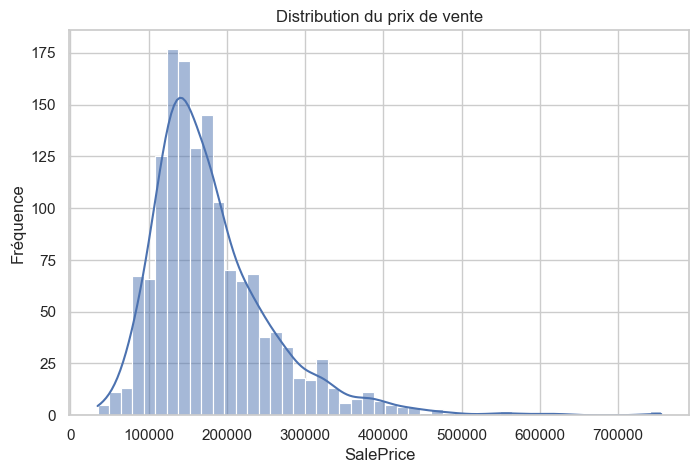

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(train_df["SalePrice"], kde=True)
plt.title("Distribution du prix de vente")
plt.xlabel("SalePrice")
plt.ylabel("Fréquence")
plt.show()


Valeurs manquantes

In [38]:
missing_count = train_df.isna().sum()
# Pourcentage de NaN
missing_pct = train_df.isna().mean() * 100

missing_summary = pd.DataFrame({
    "missing_count": missing_count,
    "missing_pct": missing_pct
}).sort_values(by="missing_pct", ascending=False)

missing_summary.head(20) 



,missing_count,missing_pct
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageQual,81,5.547945
GarageFinish,81,5.547945
GarageType,81,5.547945


In [39]:
#Suppression des variables à trop fortes valeurs manquantes 

cols_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
train_df.drop(columns=cols_drop, inplace=True)
test_df.drop(columns=cols_drop, inplace=True)

#Imputation par "None" (absence d'équipement)

garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
basement_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
fireplace_cols = ['FireplaceQu']

for col in garage_cols + basement_cols + fireplace_cols:
    train_df[col] = train_df[col].fillna("None")
    test_df[col] = test_df[col].fillna("None")

# GarageYrBlt : imputer les maisons sans garage par 0
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(0)
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna(0)

#Imputation statistique

# LotFrontage : imputer par la médiane du quartier
train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)
test_df['LotFrontage'] = test_df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

# MasVnrType : imputer par "None"
train_df['MasVnrType'] = train_df['MasVnrType'].fillna("None")
test_df['MasVnrType'] = test_df['MasVnrType'].fillna("None")

# MasVnrArea : imputer par 0
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0)
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(0)

# Electrical : imputer par le mode
mode_elec = train_df['Electrical'].mode()[0]
train_df['Electrical'] = train_df['Electrical'].fillna(mode_elec)
test_df['Electrical'] = test_df['Electrical'].fillna(mode_elec)


# Imputation finale pour tout le test_df restant
for col in test_df.columns:
    if test_df[col].isna().sum() > 0:
        if test_df[col].dtype == 'object':
            test_df[col] = test_df[col].fillna("None")
        else:
            test_df[col] = test_df[col].fillna(0)

# Vérification finale
train_df.isna().sum().sum(), test_df.isna().sum().sum()



(np.int64(0), np.int64(0))

In [40]:
train_df.shape


(1460, 77)

Traitement des valeurs aberrantes

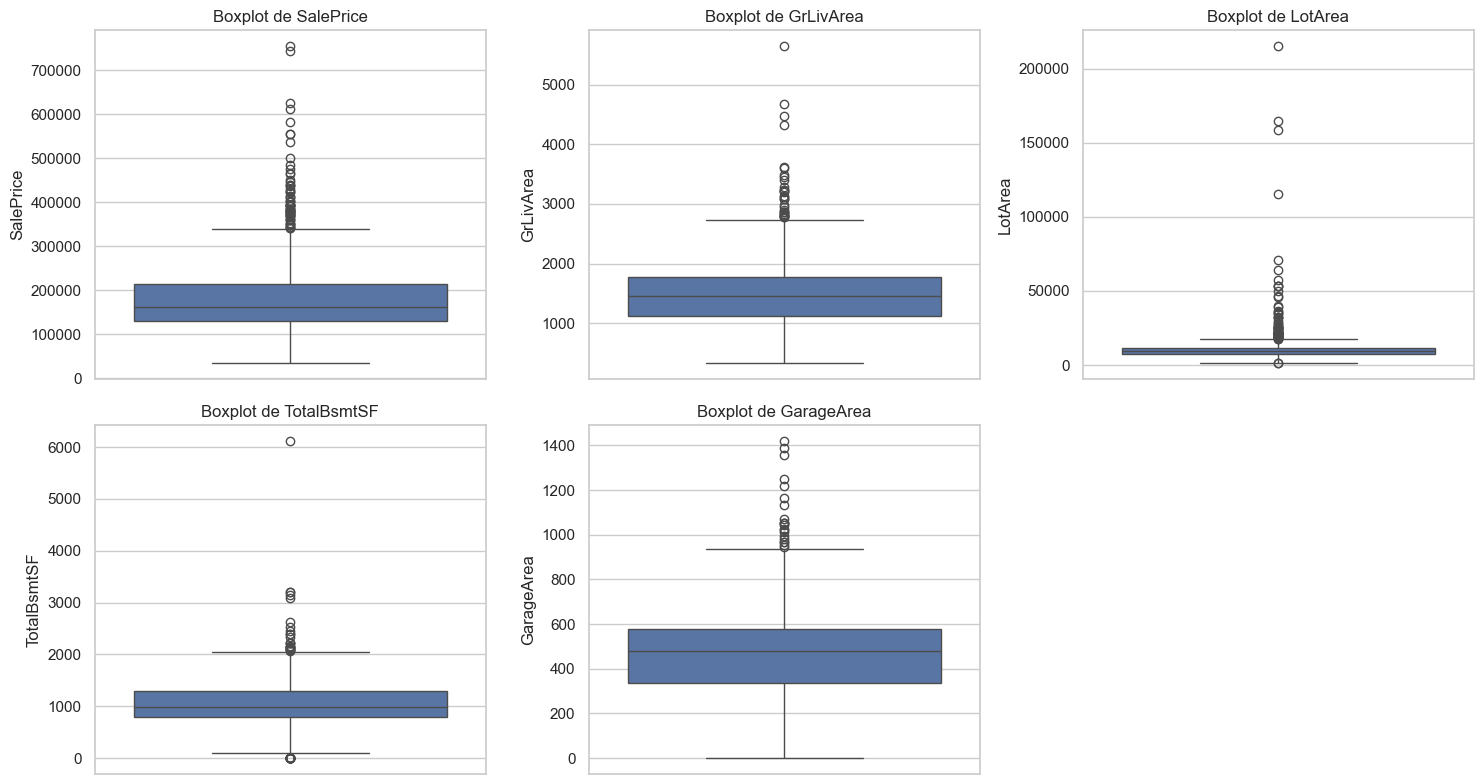

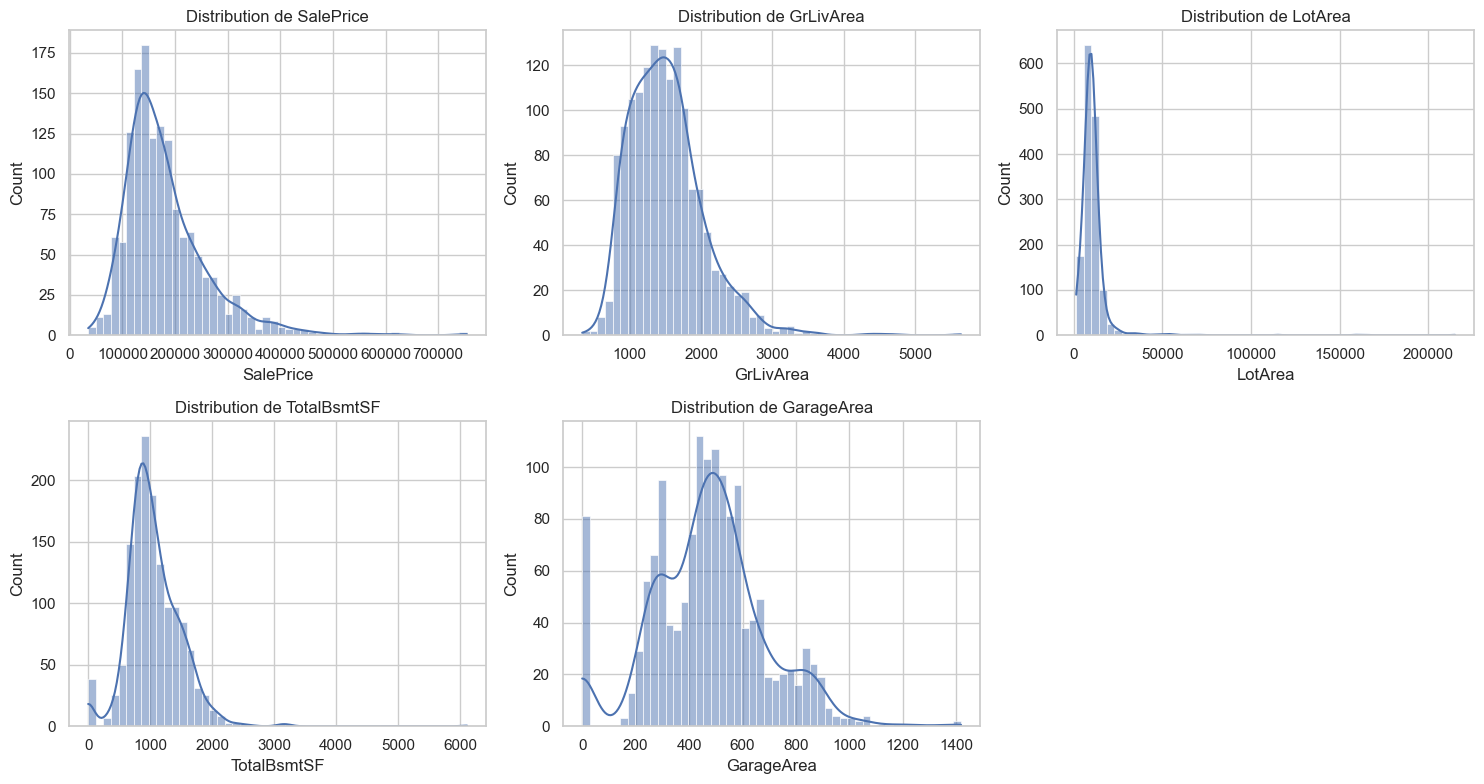

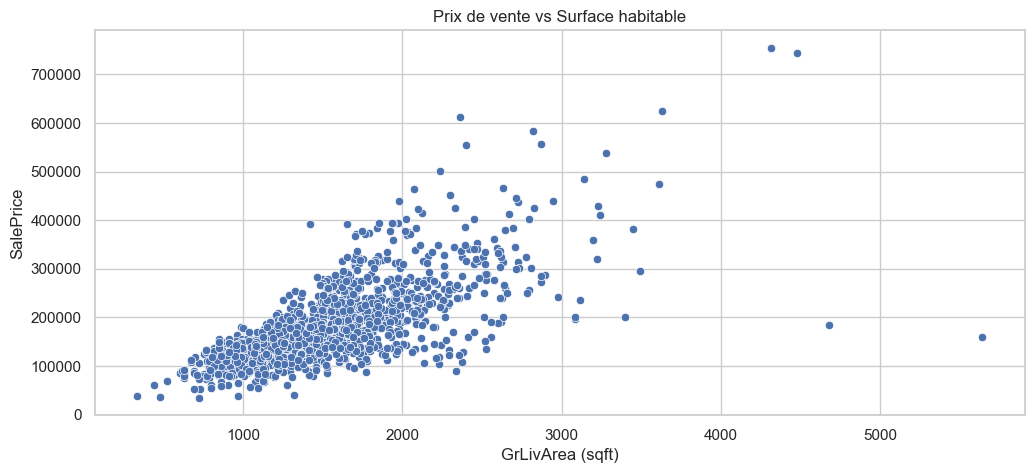

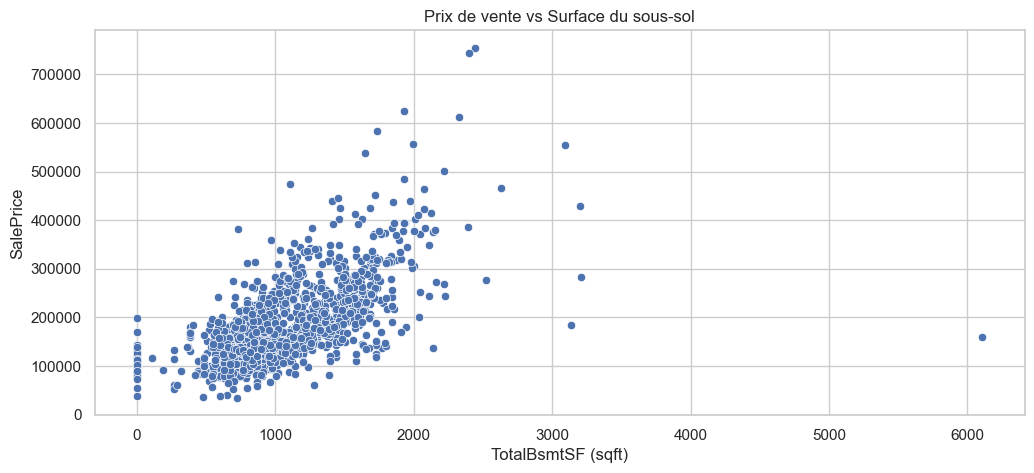

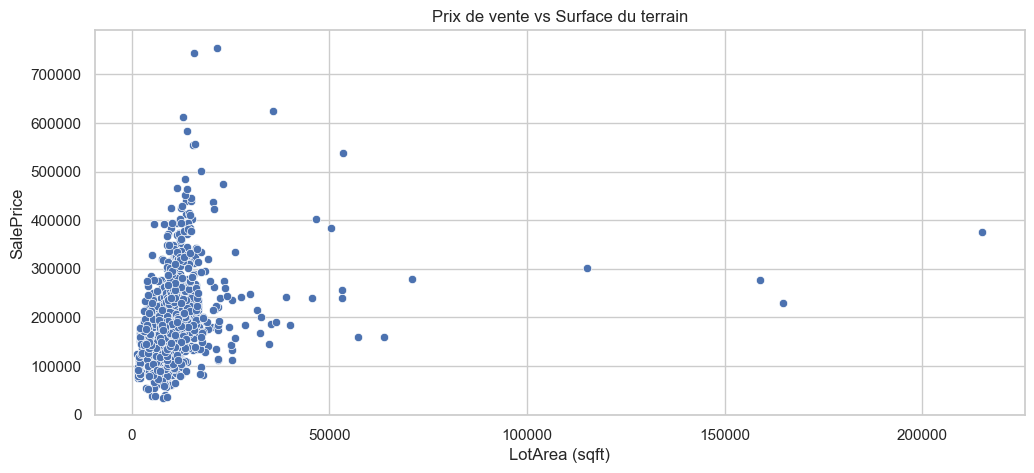

In [41]:
num_cols = ['SalePrice', 'GrLivArea', 'LotArea', 'TotalBsmtSF', 'GarageArea']

#Boxplots pour détecter les outliers

plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=train_df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

#Histogrammes pour visualiser la distribution

plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(train_df[col], bins=50, kde=True)
    plt.title(f"Distribution de {col}")
plt.tight_layout()
plt.show()

# Scatter plot : SalePrice vs surfaces

plt.figure(figsize=(12,5))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.title("Prix de vente vs Surface habitable")
plt.xlabel("GrLivArea (sqft)")
plt.ylabel("SalePrice")
plt.show()

plt.figure(figsize=(12,5))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train_df)
plt.title("Prix de vente vs Surface du sous-sol")
plt.xlabel("TotalBsmtSF (sqft)")
plt.ylabel("SalePrice")
plt.show()

plt.figure(figsize=(12,5))
sns.scatterplot(x='LotArea', y='SalePrice', data=train_df)
plt.title("Prix de vente vs Surface du terrain")
plt.xlabel("LotArea (sqft)")
plt.ylabel("SalePrice")
plt.show()

Decision : Conservées les valeurs aberrantes

Corrélation avec le prix

In [42]:
corr = train_df.corr(numeric_only=True)
corr["SalePrice"].sort_values(ascending=False).head(10)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

Graphique

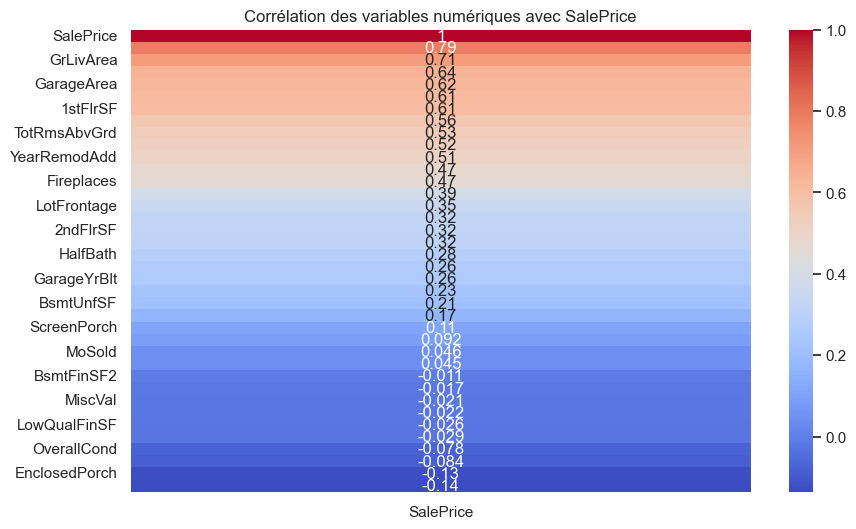

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(corr[["SalePrice"]].sort_values(by="SalePrice", ascending=False),
            annot=True, cmap="coolwarm")
plt.title("Corrélation des variables numériques avec SalePrice")
plt.show()


In [44]:
# Sélectionner uniquement les colonnes numériques
numeric_cols = train_df.select_dtypes(include=['int64', 'float64'])

# Calculer la matrice de corrélation
corr_matrix = numeric_cols.corr()

# Corrélation avec SalePrice
corr_with_target = corr_matrix['SalePrice'].sort_values(ascending=False)

# Top 10 variables les plus corrélées
top10_corr = corr_with_target.drop('SalePrice').head(100)

# Transformer en DataFrame pour le rapport
top10_corr_df = pd.DataFrame({
    'Variable': top10_corr.index,
    'Corrélation avec SalePrice': top10_corr.values
})

top10_corr_df


,Variable,Corrélation avec SalePrice
0,OverallQual,0.790982
1,GrLivArea,0.708624
2,GarageCars,0.640409
3,GarageArea,0.623431
4,TotalBsmtSF,0.613581
5,1stFlrSF,0.605852
6,FullBath,0.560664
7,TotRmsAbvGrd,0.533723
8,YearBuilt,0.522897
9,YearRemodAdd,0.507101


Detecter la multicolinéarité

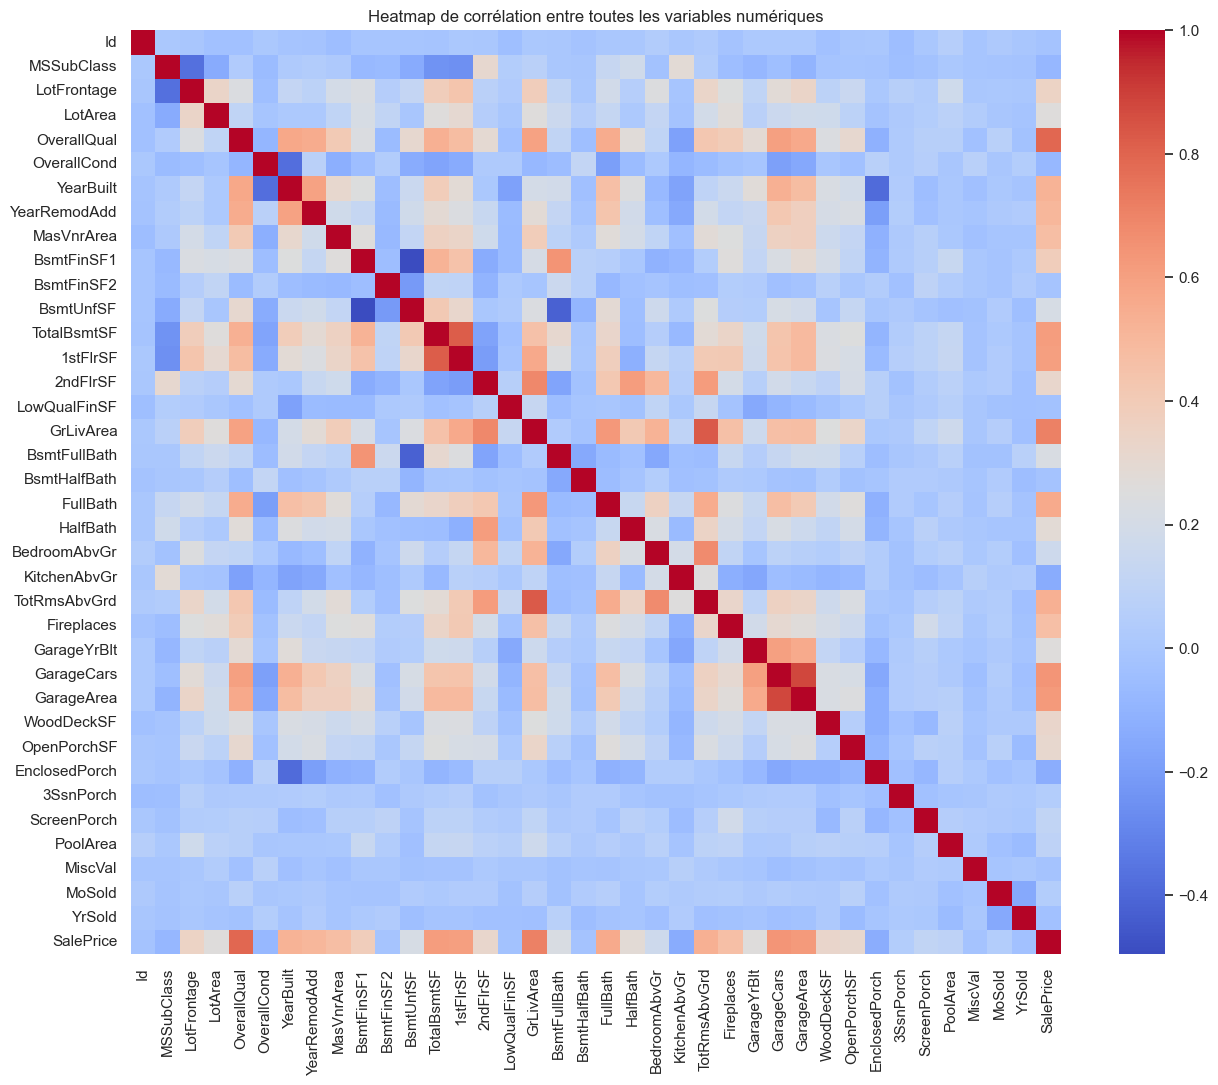

Paires de variables fortement corrélées (|corr| > 0.6) :
GarageCars et GarageArea -> corr = 0.88
GarageArea et GarageCars -> corr = 0.88
GrLivArea et TotRmsAbvGrd -> corr = 0.83
TotRmsAbvGrd et GrLivArea -> corr = 0.83
TotalBsmtSF et 1stFlrSF -> corr = 0.82
1stFlrSF et TotalBsmtSF -> corr = 0.82
OverallQual et SalePrice -> corr = 0.79
SalePrice et OverallQual -> corr = 0.79
GrLivArea et SalePrice -> corr = 0.71
SalePrice et GrLivArea -> corr = 0.71
2ndFlrSF et GrLivArea -> corr = 0.69
GrLivArea et 2ndFlrSF -> corr = 0.69
BedroomAbvGr et TotRmsAbvGrd -> corr = 0.68
TotRmsAbvGrd et BedroomAbvGr -> corr = 0.68
BsmtFinSF1 et BsmtFullBath -> corr = 0.65
BsmtFullBath et BsmtFinSF1 -> corr = 0.65
GarageCars et SalePrice -> corr = 0.64
SalePrice et GarageCars -> corr = 0.64
GrLivArea et FullBath -> corr = 0.63
FullBath et GrLivArea -> corr = 0.63
GarageArea et SalePrice -> corr = 0.62
SalePrice et GarageArea -> corr = 0.62
2ndFlrSF et TotRmsAbvGrd -> corr = 0.62
TotRmsAbvGrd et 2ndFlrSF -> cor

In [45]:


numeric_cols = train_df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Heatmap de corrélation entre toutes les variables numériques")
plt.show()

threshold = 0.6
high_corr = np.where((abs(corr_matrix) > threshold) & (abs(corr_matrix) < 1.0))
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                   for x, y in zip(*high_corr)]

high_corr_pairs_sorted = sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)


print(f"Paires de variables fortement corrélées (|corr| > {threshold}) :")
for pair in high_corr_pairs_sorted:
    print(f"{pair[0]} et {pair[1]} -> corr = {pair[2]:.2f}")

    

In [46]:
# Liste des variables à supprimer
to_drop = ['BedroomAbvGr', '2ndFlrSF', 'GarageArea', 'TotRmsAbvGrd', '1stFlrSF']

# Supprimer ces colonnes du dataset d'entraînement
train_df = train_df.drop(columns=to_drop)

# Vérif
print(train_df.shape)
train_df.head()

(1460, 72)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,0,1710,1,0,2,1,1,Gd,Typ,0,None,Attchd,2003.0,RFn,2,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,1262,0,1,2,0,1,TA,Typ,1,TA,Attchd,1976.0,RFn,2,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,0,1786,1,0,2,1,1,Gd,Typ,1,TA,Attchd,2001.0,RFn,2,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,0,1717,1,0,1,0,1,Gd,Typ,1,Gd,Detchd,1998.0,Unf,3,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,0,2198,1,0,2,1,1,Gd,Typ,1,TA,Attchd,2000.0,RFn,3,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


Sauvegarde du dataset 

In [47]:
# Enregistrement du dataset nettoyé

os.makedirs("../data/processed", exist_ok=True)

train_df.to_csv("../data/processed/train_clean.csv", index=False)




## Conclusion de l'exploration des données

L’analyse de la variable cible *SalePrice* montre une distribution asymétrique à droite.
La majorité des biens ont un prix compris entre 100 000$ et 250 000$, avec quelques
valeurs très élevées qui correspondent à des biens haut de gamme. Cette asymétrie
pourra nécessiter une transformation (logarithmique) lors de la phase de modélisation.

L’étude des corrélations entre les variables numériques et le prix de vente met en
évidence plusieurs variables fortement liées à *SalePrice*. Les variables les plus
corrélées sont :
- *OverallQual* (qualité globale du bien),
- *GrLivArea* (surface habitable),
- *GarageCars* et *GarageArea*,
- *TotalBsmtSF* et *1stFlrSF*,
- *YearBuilt*.

Ces résultats sont cohérents avec une logique métier : la taille du logement, la qualité
des matériaux et la présence d’un garage influencent fortement le prix d’une maison.

L’analyse des valeurs manquantes révèle un taux très élevé de données manquantes pour
certaines variables, notamment *PoolQC*, *MiscFeature*, *Alley* et *Fence*. Ces variables
correspondent majoritairement à des équipements rares ou optionnels. Leur absence peut
être interprétée comme l’absence réelle de ces équipements et devra être traitée
spécifiquement lors du preprocessing.

D’autres variables, comme *LotFrontage* ou les caractéristiques du garage, présentent
un nombre modéré de valeurs manquantes et nécessiteront des stratégies d’imputation
appropriées.

En conclusion, le jeu de données est riche, contient des variables numériques et
catégorielles pertinentes, mais requiert un travail de nettoyage et de transformation
avant la modélisation. Ces observations guideront les étapes de preprocessing et de
feature engineering du projet.
